# Relatório de Análise VII

## Criando Agrupamentos

In [96]:
import pandas as pd

In [97]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [98]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [41]:
dados['Valor'].mean()

5046.172821405663

In [93]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo','Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [94]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [44]:
grupo_bairro = dados.groupby('Bairro')

In [45]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [46]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [47]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data['Valor'].mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [48]:
grupo_bairro['Valor', 'Condominio'].mean().round(2)

<ipython-input-48-1dd1f92bfee0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grupo_bairro['Valor', 'Condominio'].mean().round(2)


,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [49]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [64]:
grupo_bairro['Valor'].aggregate(['min','max']).rename(columns = {'min': 'Mínimo','max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

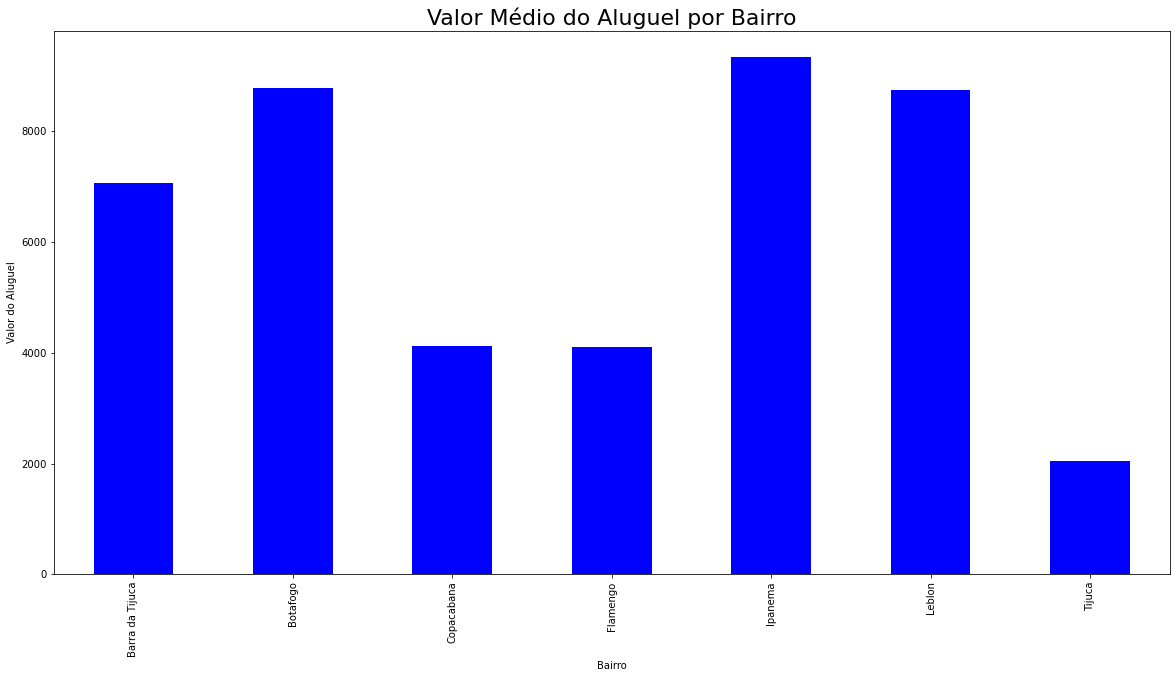

In [52]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
# std é o desvio padrão
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

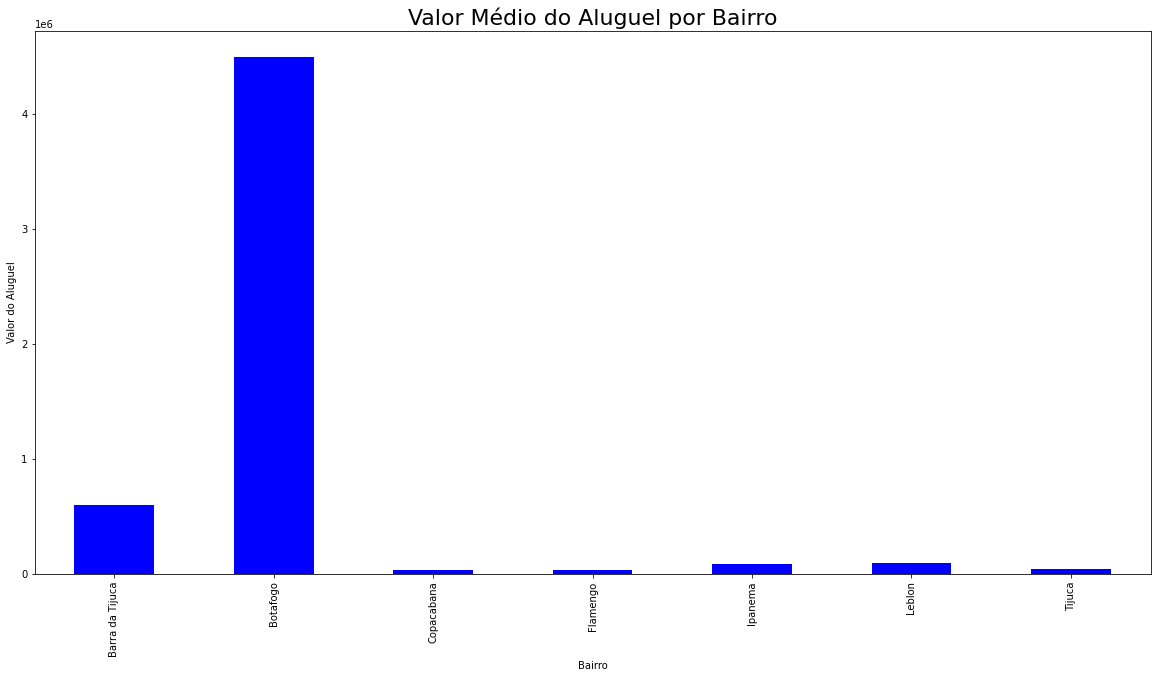

In [53]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

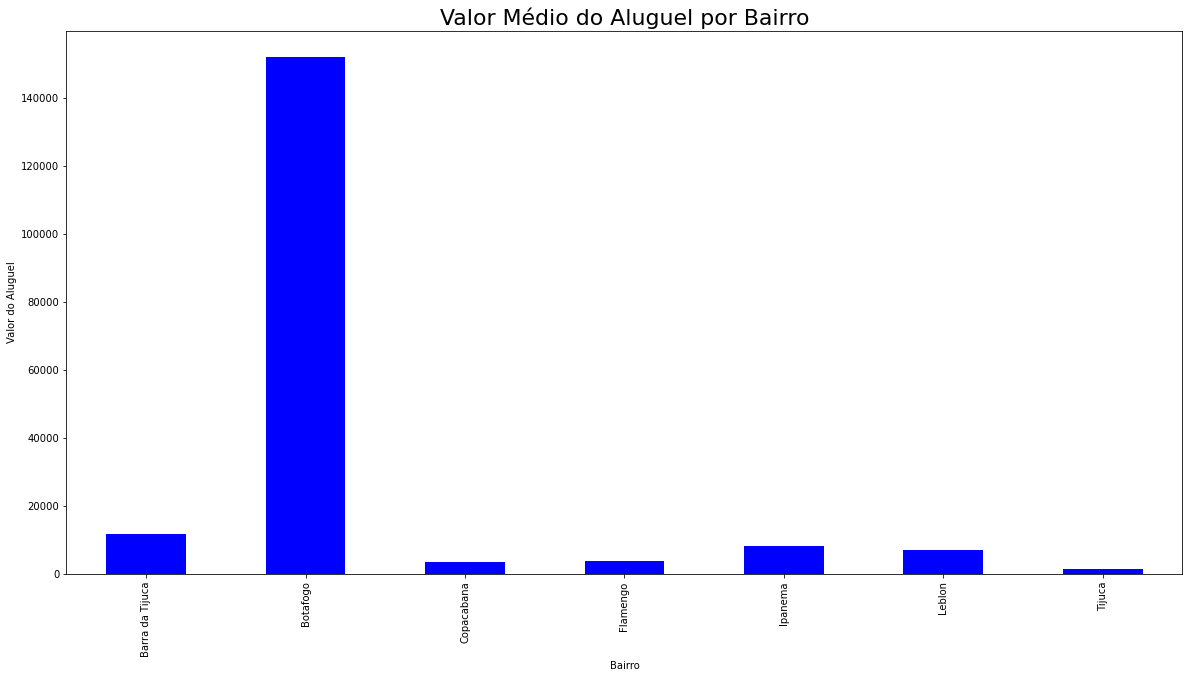

In [54]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
# std é o desvio padrão
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [55]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21816,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
21817,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
21818,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,Apartamento
21820,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


In [ ]:
# Exercicio

In [101]:
casas = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
selecao = dados['Tipo'].isin(casas)
dadosCasas = dados[selecao]

In [102]:
dados['Tipo'].drop_duplicates()

1                   Casa
5     Casa de Condomínio
81          Casa de Vila
Name: Tipo, dtype: object

In [105]:
grupo_casas = dadosCasas.groupby('Tipo')

In [106]:
type(grupo_casas)

pandas.core.groupby.generic.DataFrameGroupBy

In [108]:
grupo_casas.groups

{'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716,
             21762],
            dtype='int64', length=249)}

In [111]:
for casa,data in grupo_casas:
    print('{} -> {}'.format(casa, data['Valor'].mean()))

Casa -> 6793.454922279792
Casa de Condomínio -> 11952.06124497992
Casa de Vila -> 1574.3694779116465


In [112]:
grupo_casas['Valor', 'Condominio'].mean().round(2)

<ipython-input-112-0e39e203b4c5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grupo_casas['Valor', 'Condominio'].mean().round(2)


,Valor,Condominio
Tipo,,
Casa,6793.45,202.66
Casa de Condomínio,11952.06,1214.02
Casa de Vila,1574.37,52.94


In [113]:
grupo_casas['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
Casa,965.0,6793.45,8955.42,400.0,1100.0,2200.0,9800.0,60000.0
Casa de Condomínio,996.0,11952.06,26691.73,560.0,4000.0,8500.0,15250.0,800000.0
Casa de Vila,249.0,1574.37,1579.48,380.0,750.0,1100.0,1800.0,15000.0


In [114]:
grupo_casas['Valor'].aggregate(['min','max']).rename(columns = {'min': 'Mínimo','max': 'Máximo'})

,Mínimo,Máximo
Tipo,,
Casa,400.0,60000.0
Casa de Condomínio,560.0,800000.0
Casa de Vila,380.0,15000.0


Text(0.5, 1.0, 'Valor Médio do Aluguel por Tipo de Moradia')

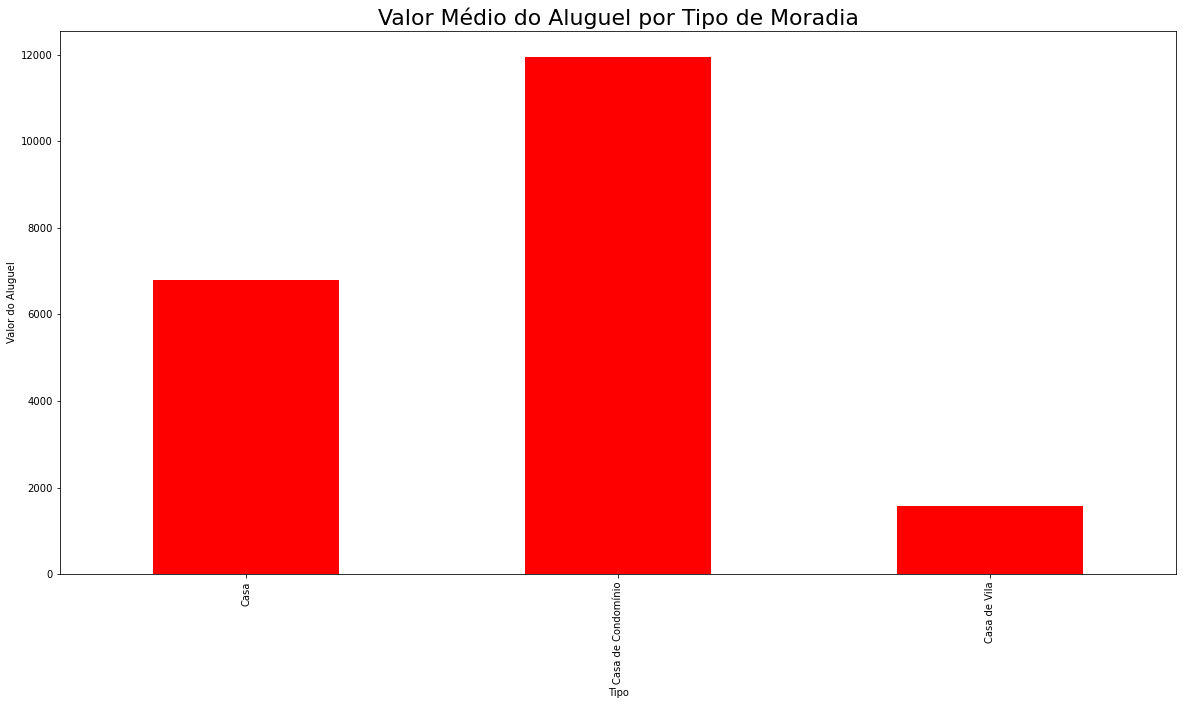

In [116]:
fig = grupo_casas['Valor'].mean().plot.bar(color = 'red')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Tipo de Moradia', {'fontsize': 22})